1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


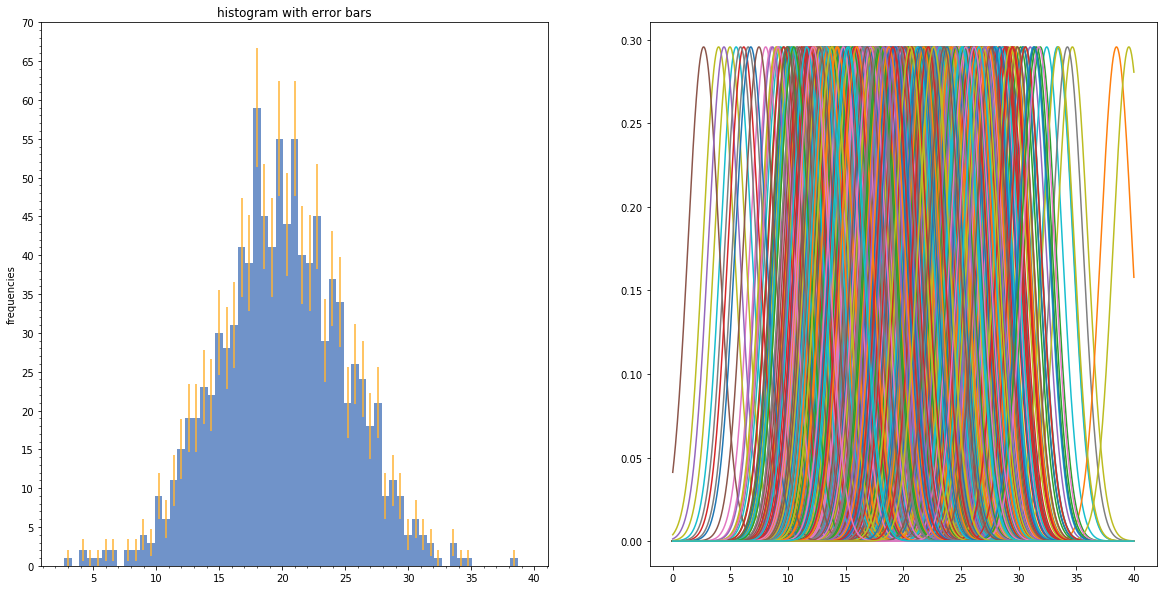

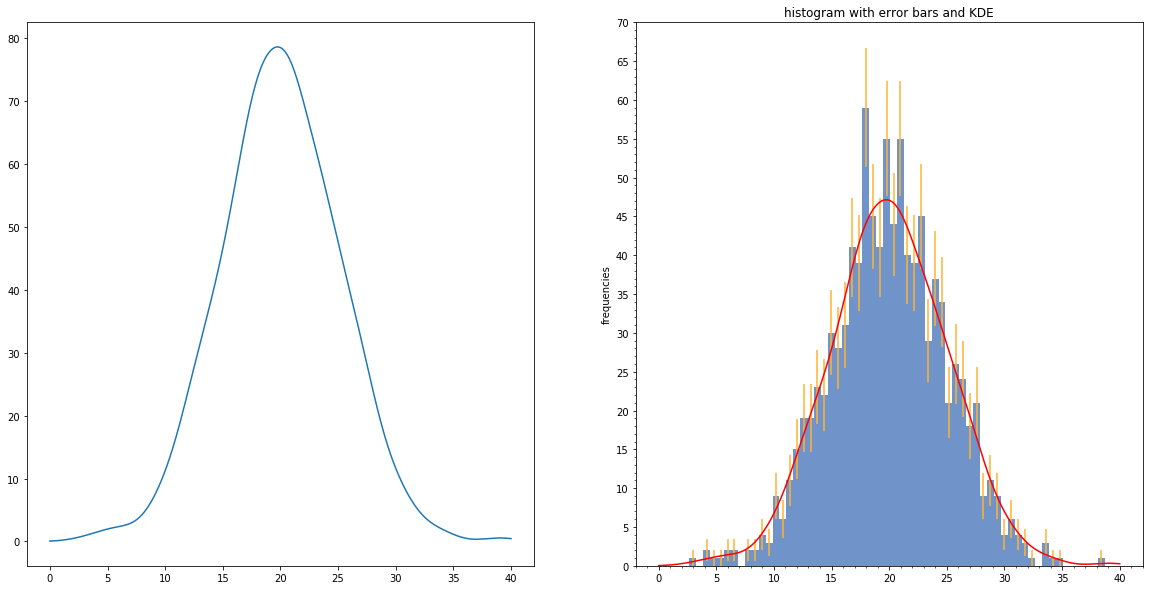

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
import numpy as np
from scipy.stats import norm
from scipy.integrate import trapz

N = 1000
mean = 20
std = 5
arr = np.random.randn(N)*std+mean

fig = plt.figure(figsize=(20, 10))
histo1 = fig.add_subplot(1, 2, 1)
n, bins, _ = histo1.hist(arr, bins=np.arange(arr.min(), arr.max(), 0.6), color=(0.2, 0.4, 0.7), alpha=0.7)
bins = [(bins[i]+bins[i+1])*0.5 for i in range(len(bins)-1)]
histo1.set_ylabel("frequencies")
histo1.xaxis.set_major_locator(MultipleLocator(5))
histo1.xaxis.set_minor_locator(MultipleLocator(1))
histo1.yaxis.set_major_locator(MultipleLocator(5))
histo1.yaxis.set_minor_locator(MultipleLocator(1))
histo1.set_title("histogram with error bars")
plt.errorbar(bins, n, yerr=n**0.5, fmt='none', color=(1, 0.7, 0.2))

x = np.linspace(0, 40, 1000)

gplot = fig.add_subplot(1, 2, 2)
for i in arr:
    plt.plot(x, norm.pdf(x, i, 1.06*arr.std()*arr.size**(-0.2)))

gauss = np.array([norm.pdf(x, i, 1.06*arr.std()*arr.size**(-0.2)) for i in arr]).reshape(N, 1000)

summed = np.array([gauss.T[i].sum() for i in range(N)])

fig2 = plt.figure(figsize=(20, 10))
totG = fig2.add_subplot(1, 2, 1)
plt.plot(x, summed)

integralH = trapz(n, bins)
integralG = trapz(summed, x)
factor = integralH/integralG

totGH = fig2.add_subplot(1, 2, 2)
totGH.hist(arr, bins=np.arange(arr.min(), arr.max(), 0.6), color=(0.2, 0.4, 0.7), alpha=0.7)
totGH.set_ylabel("frequencies")
totGH.xaxis.set_major_locator(MultipleLocator(5))
totGH.xaxis.set_minor_locator(MultipleLocator(1))
totGH.yaxis.set_major_locator(MultipleLocator(5))
totGH.yaxis.set_minor_locator(MultipleLocator(1))
totGH.set_title("histogram with error bars and KDE")
plt.errorbar(bins, n, yerr=n**0.5, fmt='none', color=(1, 0.7, 0.2))
plt.plot(x, summed*factor, color='r')
    
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

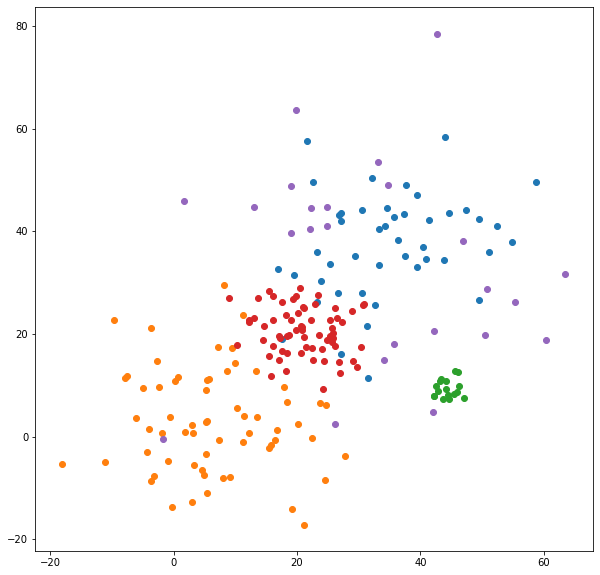

In [39]:
nCat = 5 #3
nDat = np.random.randint(0, 100, nCat) #[30, 30, 50]
sig = np.random.randint(0, 20, nCat) #[3, 7, 2]
mean = np.random.randint(0, 50, nCat*2) #[10, 20, 15, 40, 20, 30]
data = []

fig = plt.figure(figsize=(10, 10))
graph = fig.add_subplot(1, 1, 1)

j=0
for i in range(nCat):
    data.append(np.random.randn(nDat[i])*sig[i]+mean[j])
    data.append(np.random.randn(nDat[i])*sig[i]+mean[j+1])
    graph.scatter(data[j], data[j+1], marker='o')
    j=j+2

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

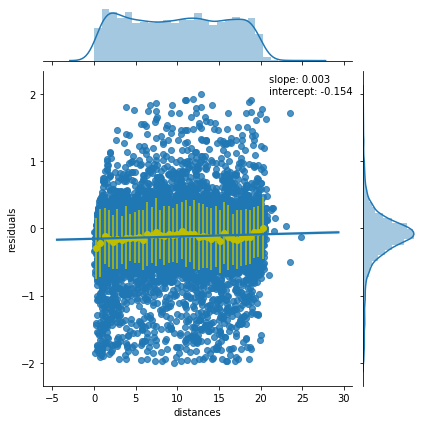

In [144]:
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

res = pd.DataFrame(np.load("residuals_261.npy", allow_pickle=True).item())

res = res[abs(res["residuals"])<2]
results = linregress(res["distances"], res["residuals"])
ax = sns.jointplot(x="distances", y="residuals", data=res, kind="reg")

x = np.linspace(0, 20, 40) + 0.25
y = np.array([res[(res["distances"]<(i+0.25)) & (res["distances"]>=(i-0.25))]["residuals"].mean() for i in x])
erry = np.array([res[(res["distances"]<(i+0.25)) & (res["distances"]>=(i-0.25))]["residuals"].std() for i in x])

plt.scatter(x, y, c='y')
plt.errorbar(x, y, yerr=erry, fmt='none', c='y')

results = "slope: "+str(round(results.slope, 3))+"\n"+"intercept: "+str(round(results.intercept, 3))
plt.annotate(results, xy=(21, 2))

plt.show()